In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [7]:
import sys
import os
sys.path.append(os.path.abspath('../BestFitPlane/src'))

from CA_C_N_parsing import B_X, B_Y, B_Z, C_X, C_Y, C_Z, E_X, E_Y, E_Z, F_X, F_Y, F_Z


FileNotFoundError: [Errno 2] No such file or directory: '../ATOMlines1CD8_BCEF.txt'

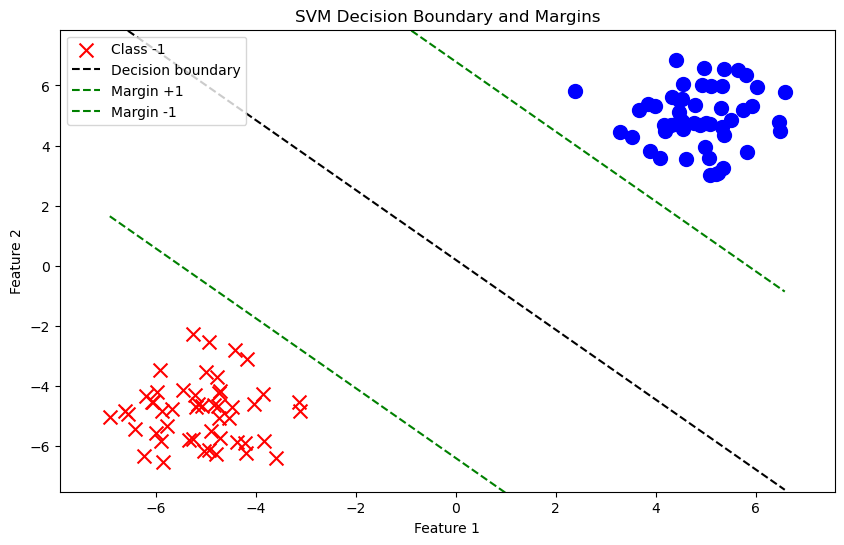

In [17]:


class SVM:
    def __init__(self, learning_rate=0.01, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = np.where(y <= 0, -1, 1)
        
        self.w = np.zeros(n_features)
        self.b = 0
        
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y[idx]))
                    self.b -= self.lr * y[idx]
    
    def predict(self, x):
        approx = np.dot(x, self.w) - self.b
        return np.sign(approx)

    def plot_hyperplanes(self, X, y):
        def get_hyperplane_value(x, w, b, offset):
            return (-w[0] * x + b + offset) / w[1]
        
        plt.figure(figsize=(10, 6))
        
        # Plotting the data points
        for idx, label in enumerate(y):
            if label == 1:
                plt.scatter(X[idx][0], X[idx][1], color='b', marker='o', s=100, label="Class 1" if idx == 0 else "")
            else:
                plt.scatter(X[idx][0], X[idx][1], color='r', marker='x', s=100, label="Class -1" if idx == 0 else "")
        
        # Plot the decision boundary and margins
        x0_1 = np.amin(X[:, 0])
        x0_2 = np.amax(X[:, 0])
        
        # Decision boundary
        x1_1 = get_hyperplane_value(x0_1, self.w, self.b, 0)
        x1_2 = get_hyperplane_value(x0_2, self.w, self.b, 0)
        plt.plot([x0_1, x0_2], [x1_1, x1_2], 'k--', label="Decision boundary")
        
        # Positive margin
        x1_1 = get_hyperplane_value(x0_1, self.w, self.b, 1)
        x1_2 = get_hyperplane_value(x0_2, self.w, self.b, 1)
        plt.plot([x0_1, x0_2], [x1_1, x1_2], 'g--', label="Margin +1")
        
        # Negative margin
        x1_1 = get_hyperplane_value(x0_1, self.w, self.b, -1)
        x1_2 = get_hyperplane_value(x0_2, self.w, self.b, -1)
        plt.plot([x0_1, x0_2], [x1_1, x1_2], 'g--', label="Margin -1")
        
        # Axis limits and labels
        plt.xlim([x0_1 - 1, x0_2 + 1])
        plt.ylim([np.amin(X[:, 1]) - 1, np.amax(X[:, 1]) + 1])
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.legend()
        plt.title("SVM Decision Boundary and Margins")
        plt.show()

if __name__ == "__main__":
    
        np.random.seed(42)

# Generate 50 points for Class 1 centered at (5, 5)
        X_class1 = np.random.randn(50, 2) + [5, 5]
        y_class1 = np.ones(50)

        # Generate 50 points for Class -1 centered at (-5, -5)
        X_class2 = np.random.randn(50, 2) + [-5, -5]
        y_class2 = -np.ones(50)

        # Combine both classes to create the dataset
        X = np.vstack((X_class1, X_class2))
        y = np.hstack((y_class1, y_class2))

        # Shuffle the dataset to mix class labels
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)
        X = X[indices]
        y = y[indices]

        
    # Initialize and train the SVM
        clf = SVM(learning_rate=0.01, lambda_param=0.01, n_iters=1000)
        clf.fit(X, y)

    # Plot the data points and hyperplanes
        clf.plot_hyperplanes(X, y)


AttributeError: 'tuple' object has no attribute 'size'

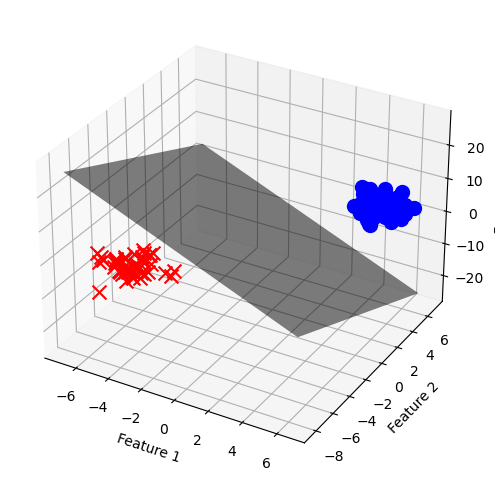

In [18]:




class SVM:
    def __init__(self, learning_rate=0.01, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = np.where(y <= 0, -1, 1)
        
        self.w = np.zeros(n_features)
        self.b = 0
        
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y[idx]))
                    self.b -= self.lr * y[idx]
    
    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

    def plot_hyperplanes(self, X, y):
        fig = plt.figure(figsize=(10, 6))
        ax = fig.add_subplot(111, projection='3d')

        # Plotting the data points
        for idx, label in enumerate(y):
            if label == 1:
                ax.scatter(X[idx][0], X[idx][1], X[idx][2], color='b', marker='o', s=100, label="Class 1" if idx == 0 else "")
            else:
                ax.scatter(X[idx][0], X[idx][1], X[idx][2], color='r', marker='x', s=100, label="Class -1" if idx == 0 else "")

        # Create a grid for plotting the decision boundary in 3D
        x0_range = np.linspace(np.amin(X[:, 0]), np.amax(X[:, 0]), 50)
        x1_range = np.linspace(np.amin(X[:, 1]), np.amax(X[:, 1]), 50)
        x0, x1 = np.meshgrid(x0_range, x1_range)
        x2 = (-self.w[0] * x0 - self.w[1] * x1 - self.b) / self.w[2]
        
        # Plot decision boundary (a plane in 3D)
        ax.plot_surface(x0, x1, x2, color='k', alpha=0.5, rstride=100, cstride=100, label="Decision boundary")

        # Axis labels
        ax.set_xlabel("Feature 1")
        ax.set_ylabel("Feature 2")
        ax.set_zlabel("Feature 3")
        ax.legend()
        ax.set_title("SVM Decision Boundary in 3D")
        plt.show()

if __name__ == "__main__":
    np.random.seed(42)

    # Generate 50 points for Class 1 centered at (5, 5, 5)
    X_class1 = np.random.randn(50, 3) + [5, 5, 5]
    y_class1 = np.ones(50)

    # Generate 50 points for Class -1 centered at (-5, -5, -5)
    X_class2 = np.random.randn(50, 3) + [-5, -5, -5]
    y_class2 = -np.ones(50)

    # Combine both classes to create the dataset
    X = np.vstack((X_class1, X_class2))
    y = np.hstack((y_class1, y_class2))

    # Shuffle the dataset to mix class labels
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X = X[indices]
    y = y[indices]

    # Initialize and train the SVM
    clf = SVM(learning_rate=0.01, lambda_param=0.01, n_iters=1000)
    clf.fit(X, y)

    # Plot the data points and hyperplanes
    clf.plot_hyperplanes(X, y)
